Performing Facial Recognition with Deep Learning

Step 1: Import the Relevant Packages

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [22]:
import numpy as np

data = np.load('ORL_faces.npz', allow_pickle=True)
lst = data.files

for item in lst:
    print(item)
    print(data[item])

testY
[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14
 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19]
testX
[[ 41.  47.  47. ...  35.  37.  38.]
 [ 44.  43.  32. ...  43.  43.  37.]
 [ 42.  41.  44. ...  42.  43.  41.]
 ...
 [101. 100. 103. ...  31.  40.  42.]
 [105. 108. 106. ...  44.  40.  47.]
 [113. 114. 111. ...  62.  81.  89.]]
trainX
[[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]
trainY
[ 0  0  0  0  0  0  0  0  0  0

In [ ]:
Step 2: Upload and Import the Data

In [68]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in range(1, 41):  
        subfolder = os.path.join(folder, f's{label}')
        for filename in os.listdir(subfolder):
            img = cv2.imread(os.path.join(subfolder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                images.append(img)
                labels.append(label - 1)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('dataset')

In [ ]:
Step 3: View a Few Images

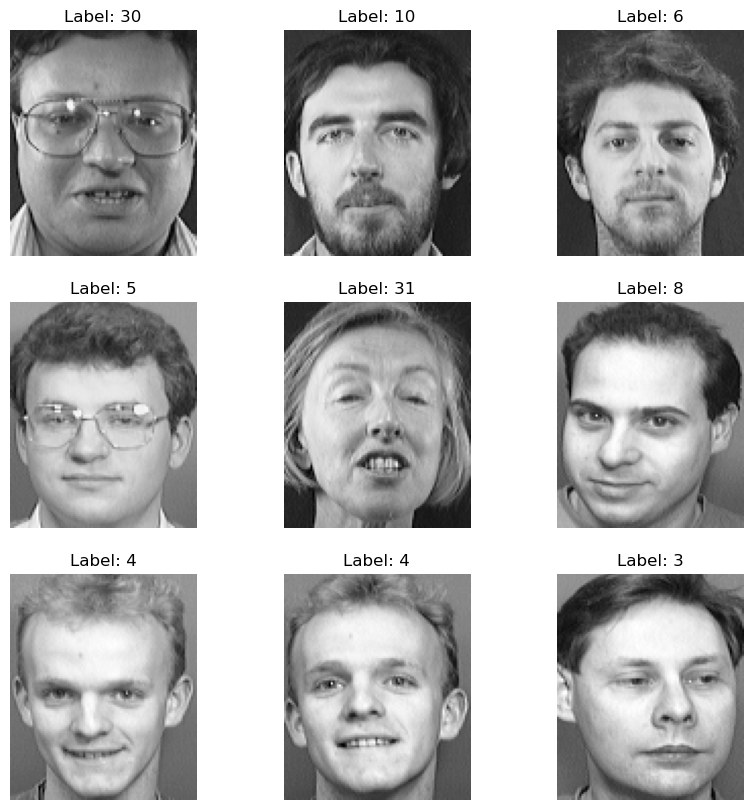

In [72]:
import random

# Function to display a few random images
def display_random_images(images, labels, num_images=9):
    plt.figure(figsize=(10, 10))
    random_indices = random.sample(range(images.shape[0]), num_images)
    for i, idx in enumerate(random_indices):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"Label: {labels[idx]}")
        plt.axis('off')
    plt.show()

# Display random images
display_random_images(images, labels)

Step 4: Create a Validation Framework

In [74]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
'''
X_train = data['trainX'] 
Y_train = data['trainY']
X_temp = data['testX']
Y_temp = data['testY']
'''
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
Step 5: Data Preparation

In [76]:
X_train = X_train.reshape(-1, 92, 112, 1)
X_val = X_val.reshape(-1, 92, 112, 1)
X_test = X_test.reshape(-1, 92, 112, 1)

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 40)
y_val = to_categorical(y_val, 40)
y_test = to_categorical(y_test, 40)

Step 6: Build the CNN Model

In [78]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(92, 112, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(40, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
#Model Summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 90, 110, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 55, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 43, 53, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 34944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,472,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 40)             │         5,160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,496,936 (17.15 MB)

 Trainable params: 4,496,936 (17.15 MB)

 Non-trainable params: 0 (0.00 B)

Step 7: Training the Model

In [83]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.0174 - loss: 3.8383 - val_accuracy: 0.0375 - val_loss: 3.6716
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.0477 - loss: 3.6340 - val_accuracy: 0.0500 - val_loss: 3.6262
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.0716 - loss: 3.5276 - val_accuracy: 0.0750 - val_loss: 3.5861
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.0873 - loss: 3.3639 - val_accuracy: 0.1000 - val_loss: 3.4254
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.2087 - loss: 3.1214 - val_accuracy: 0.2125 - val_loss: 3.0884
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3273 - loss: 2.7166 - val_accuracy: 0.3250 - val_loss: 2.8053
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.5627 - loss: 2.2326 - val_accuracy: 0.4000 - val_loss: 2.5164
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.6878 - loss: 1.6784 - val_accuracy: 0.5375 - val_loss: 1.9921

Step 8: Plot the Results

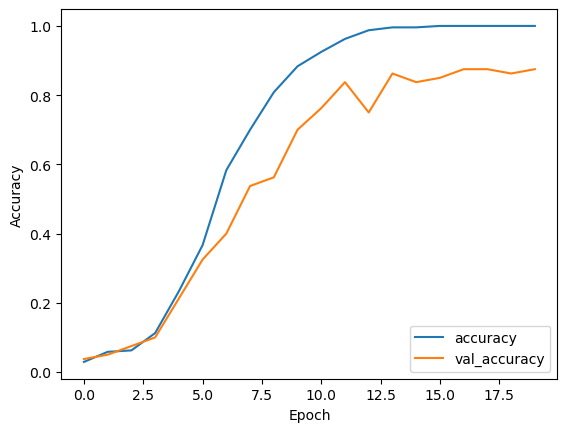

In [85]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Step 9: Iterate and Improve

Accuracy is more than 90%